In [1]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from sklearn.metrics import mean_squared_error


from smt.explainability_tools import PartialDependenceDisplay, PDFeatureImportanceDisplay
from smt.explainability_tools import partial_dependence, pd_feature_importance
from smt.explainability_tools import pd_pairwise_interaction, pd_overall_interaction, PDFeatureInteractionDisplay
from smt.explainability_tools import ShapDisplay

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


In [25]:
def friedman(x):
    y = 100 * np.sin(np.pi * x[:, 0] * x[:, 1]) + 20 * (x[:, 2]-0.5)**2 + 10 * x[:, 3] + 5 * x[:, 4]
    y = y + np.random.normal(len(y))
    return y

In [26]:
ndim = 5
xlimits = []
for i in range(ndim):
    xlimits.append([0, 1])
xlimits = np.array(xlimits)

sampling = LHS(
    xlimits=xlimits, 
    criterion="ese", 
    random_state=1
)
ndoe = 200
X = sampling(ndoe)
y = friedman(X)

n_train = int(0.8*ndoe)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

kriging_model = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
kriging_model.set_training_values(
    X_tr, 
    y_tr
    )

kriging_model.train()
y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 160
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  2.0615571
RMSE: 0.0113
rRMSE: 0.0000


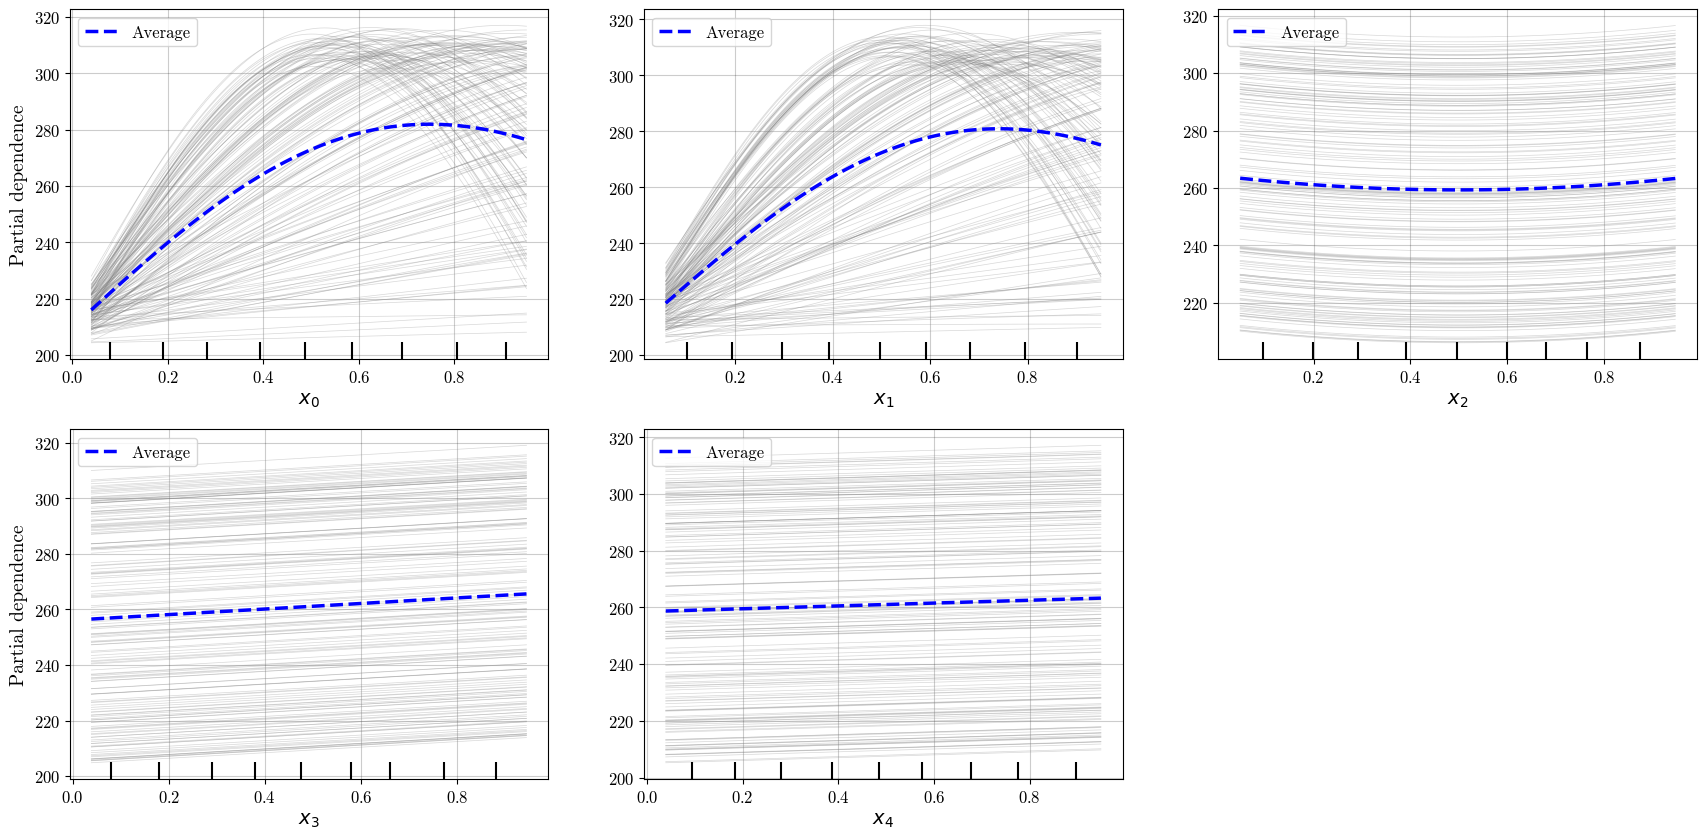

In [27]:
model = kriging_model
features = [i for i in range(ndim)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    features, 
    grid_resolution=100, 
    kind='both',
    centered=False,
)

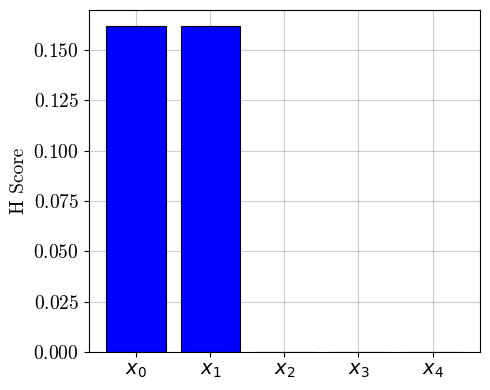

In [28]:
model = kriging_model

overall_pd_interaction = PDFeatureInteractionDisplay.overall_interaction(
    model,
    X_tr,
)

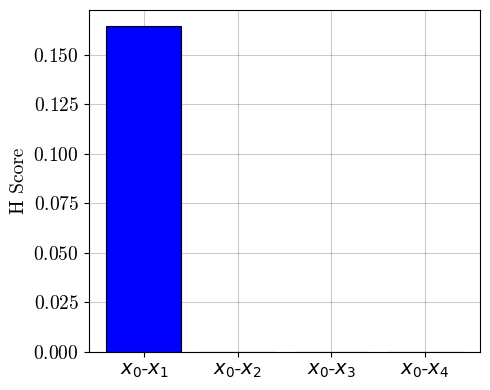

In [29]:
model = kriging_model
features = [i for i in range(ndim)]
feature_i = 0
feature_pairs = [
    (feature_i, feature_j) for feature_j in features if feature_j != feature_i
]


pairwise_pd_interaction = PDFeatureInteractionDisplay.pairwise_interaction(
    model,
    X_tr,
    feature_pairs,
)

In [30]:
instances = X_tr
model = kriging_model

display = ShapDisplay.from_surrogate_model(
    instances, 
    model, 
    X_tr, 
)

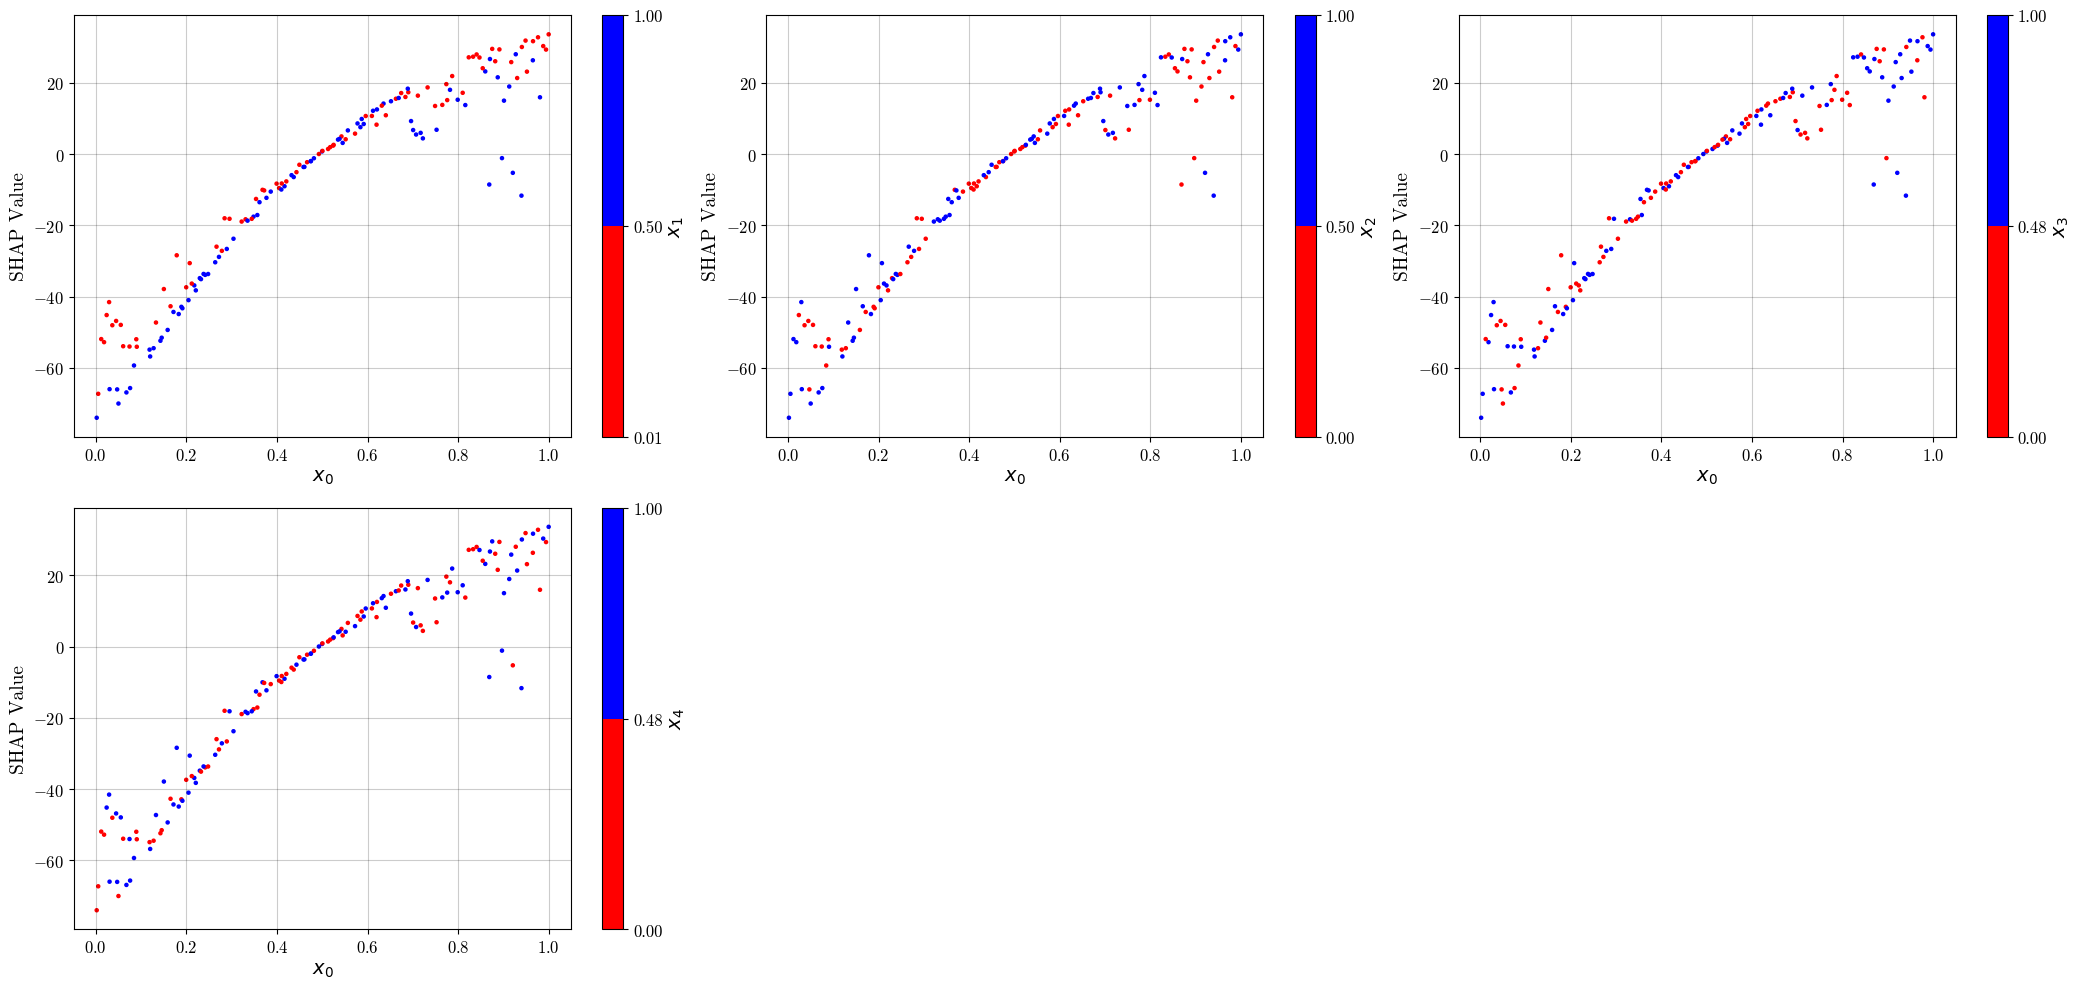

In [31]:
feature_pairs = [
    (0, 1),
    (0, 2), 
    (0, 3), 
    (0, 4)
]
display.dependence_plot(
    feature_pairs
)
